In [2]:
"""!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib"""

'!pip install pandas\n!pip install numpy\n!pip install seaborn\n!pip install matplotlib'

In [3]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
# Read data
environmental_data = pd.read_csv("datasets/Mexico_Environmental_Indicators.csv", index_col="Year", parse_dates=True)

#set seed for reproducibility
np.random.seed(0)

In [5]:
environmental_data.head()


,Agricultural land (% of land area),Arable land (% of land area),Renewable energy consumption (% of total final energy consumption),CO2 emissions from gaseous fuel consumption (kt),Access to electricity (% of population),CO2 emissions (kt),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Total greenhouse gas emissions (kt of CO2 equivalent),CO2 emissions from gaseous fuel consumption (% of total)
Year,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,99.400002,NaN,NaN,NaN,NaN
2019-01-01,NaN,NaN,10.34,NaN,99.599998,449269.989014,NaN,653869.995117,NaN
2018-01-01,54.986497,12.297127,10.03,NaN,99.500000,452570.007324,NaN,654250.000000,NaN
2017-01-01,55.024049,12.297127,9.99,NaN,100.000000,471579.986572,NaN,671599.975586,NaN
2016-01-01,54.009620,11.403071,9.22,151579.112,99.500000,473309.997559,57197.253906,674000.000000,31.628401


In [6]:
# Get number of missing data points per column
missing_values_count = environmental_data.isnull().sum()

# Look at number of missing points in all columns (use [0:number] to get first number of columns
missing_values_count[0:]


Agricultural land (% of land area)                                                            3
Arable land (% of land area)                                                                  3
Renewable energy consumption (% of total final energy consumption)                           31
CO2 emissions from gaseous fuel consumption (kt)                                              4
Access to electricity (% of population)                                                      32
CO2 emissions (kt)                                                                           31
Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)    14
Total greenhouse gas emissions (kt of CO2 equivalent)                                        31
CO2 emissions from gaseous fuel consumption (% of total)                                      4
dtype: int64

In [7]:
# total missing values
total_cells = np.product(environmental_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)


27.86885245901639


# Imputation
Try to guess what missing values might have been based on the other values in that column and row.


In [8]:
# It's also possible to remove all columns with at least one missing value
columns_with_na_dropped = environmental_data.dropna(axis=1)
columns_with_na_dropped.head()

""
Year
2020-01-01
2019-01-01
2018-01-01
2017-01-01
2016-01-01


Rows with NaN can be removed with dropna(), but I won't do that in this dataset because all of the data is relevant.

In [9]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % environmental_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])


Columns in original dataset: 9 

Columns with na's dropped: 0


I lost the whole important data


# Filling in missing values automatically
It's also possible to try and fill in the missing values.

In [10]:
# Get a small subset of the Environmental Dataset
subset_environmental_data = environmental_data.loc[:, 'Agricultural land (% of land area)':'Arable land (% of land area)'].head()


subset_environmental_data


,Agricultural land (% of land area),Arable land (% of land area)
Year,,
2020-01-01,NaN,NaN
2019-01-01,NaN,NaN
2018-01-01,54.986497,12.297127
2017-01-01,55.024049,12.297127
2016-01-01,54.009620,11.403071


Pandas .fillna('value') can be used to fill in missing values specifying what value to use to replace them.
Replace NA's with the value that comes directly after or before it in the same column and all remaining NA's with 0
subset_environmental_data.fillna(method='bfill', axis=0).fillna(0)



In [11]:
subset_environmental_data.fillna(method='bfill', axis=0).fillna(0)


,Agricultural land (% of land area),Arable land (% of land area)
Year,,
2020-01-01,54.986497,12.297127
2019-01-01,54.986497,12.297127
2018-01-01,54.986497,12.297127
2017-01-01,55.024049,12.297127
2016-01-01,54.009620,11.403071


In [12]:
# I'll try the last operation with a copy of the original set
copy_environmental_data = environmental_data
copy_environmental_data.fillna(method='bfill', axis=0).fillna(0)


,Agricultural land (% of land area),Arable land (% of land area),Renewable energy consumption (% of total final energy consumption),CO2 emissions from gaseous fuel consumption (kt),Access to electricity (% of population),CO2 emissions (kt),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Total greenhouse gas emissions (kt of CO2 equivalent),CO2 emissions from gaseous fuel consumption (% of total)
Year,,,,,,,,,
2020-01-01,54.986497,12.297127,10.34,151579.112,99.400002,449269.989014,57197.253906,653869.995117,31.628401
2019-01-01,54.986497,12.297127,10.34,151579.112,99.599998,449269.989014,57197.253906,653869.995117,31.628401
2018-01-01,54.986497,12.297127,10.03,151579.112,99.500000,452570.007324,57197.253906,654250.000000,31.628401
2017-01-01,55.024049,12.297127,9.99,151579.112,100.000000,471579.986572,57197.253906,671599.975586,31.628401
2016-01-01,54.009620,11.403071,9.22,151579.112,99.500000,473309.997559,57197.253906,674000.000000,31.628401
...,...,...,...,...,...,...,...,...,...
1964-01-01,50.438026,9.866509,0.00,13465.224,0.000000,0.000000,0.000000,0.000000,18.127962
1963-01-01,50.468891,9.907662,0.00,11668.394,0.000000,0.000000,0.000000,0.000000,17.583025
1962-01-01,50.504900,9.948816,0.00,11859.078,0.000000,0.000000,0.000000,0.000000,18.585139


Now I can get useful visualization with seaborn


Text(0.5, 1.0, 'Yearly changes in environmental indicators')

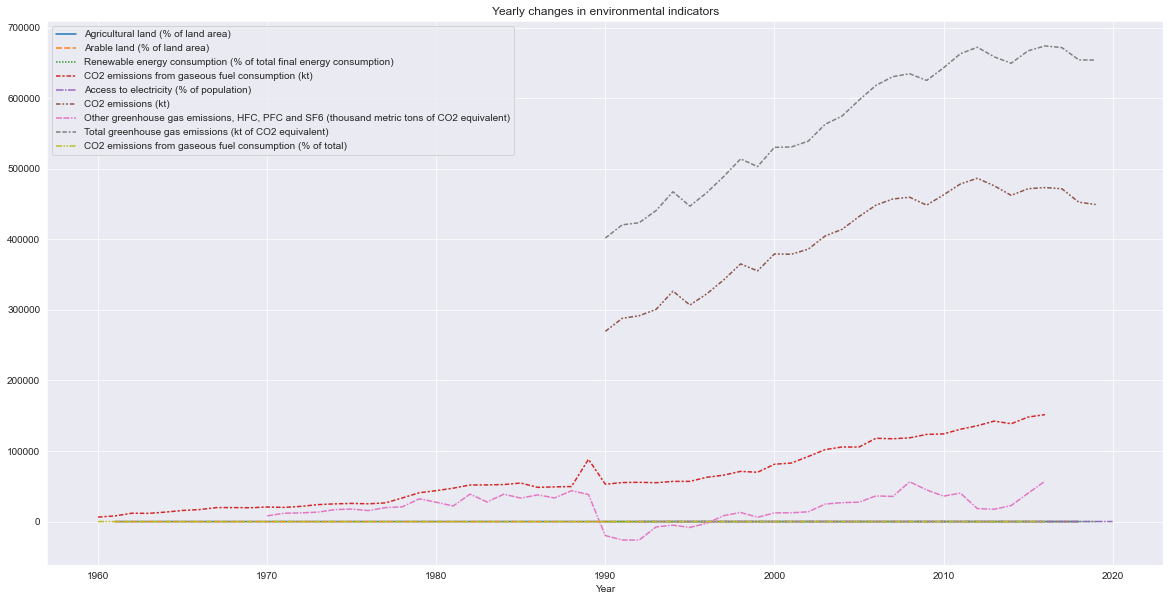

In [13]:
# Line chart showing yearly changes in environmental indicators
plt.figure(figsize=(20,10))
sns.lineplot(data=copy_environmental_data)
plt.title("Yearly changes in environmental indicators")


I can compare values like % of land area from Agricultural land and Arable land


Text(0.5, 0, 'Year')

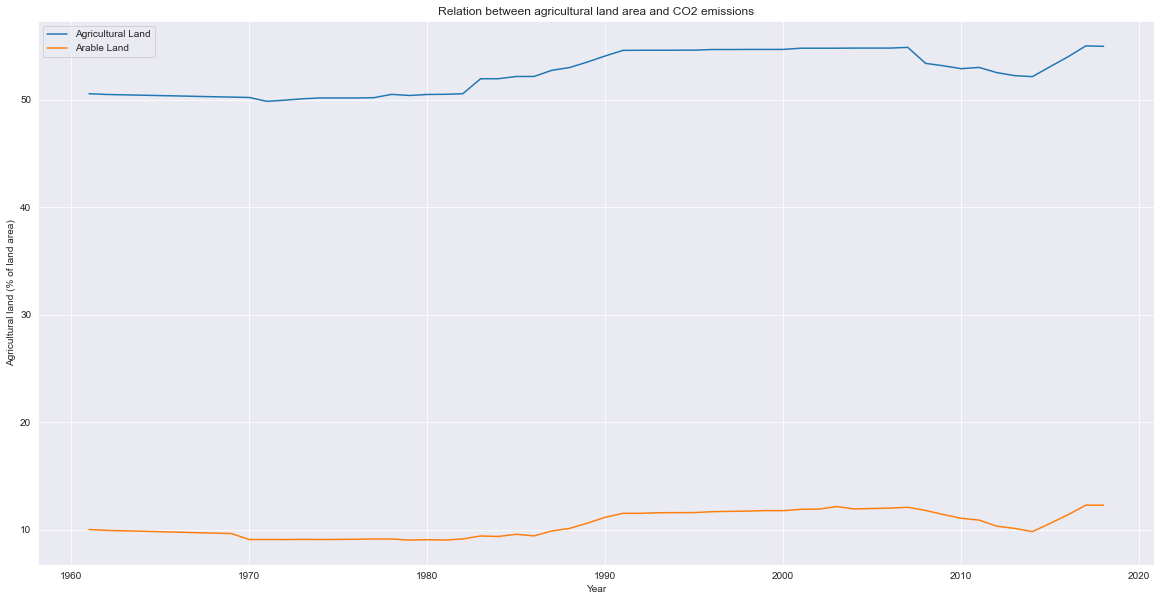

In [14]:
plt.figure(figsize=(20,10))
plt.title('Relation between agricultural land area and CO2 emissions')
sns.lineplot(data=copy_environmental_data['Agricultural land (% of land area)'], label="Agricultural Land")
sns.lineplot(data=copy_environmental_data['Arable land (% of land area)'], label='Arable Land')
plt.xlabel('Year')


<AxesSubplot:xlabel='Year', ylabel='Renewable energy consumption (% of total final energy consumption)'>

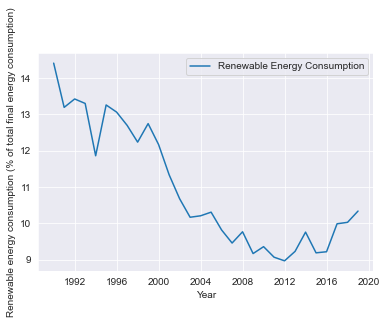

In [15]:
sns.lineplot(data=copy_environmental_data['Renewable energy consumption (% of total final energy consumption)'], label='Renewable Energy Consumption')


It's interesting to notice how in the past, the percentage of Renewable energy consumption in relation with the other energies was higher than in recent years.

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


,AÑO,USO_CONSUNTIVO,VOLUMEN_(HECTOMETROS_CUBICOS)
0,2001,Agropecuario,56483
1,2001,Abastecimiento publico,9562
2,2001,Industria,6619
3,2002,Agropecuario,56070
4,2002,Abastecimiento publico,9633
5,2002,Industria,6940
6,2003,Agropecuario,56900
7,2003,Abastecimiento publico,10481
8,2003,Industria,7307
9,2004,Agropecuario,57462


Text(0.5, 0, 'AÑO')

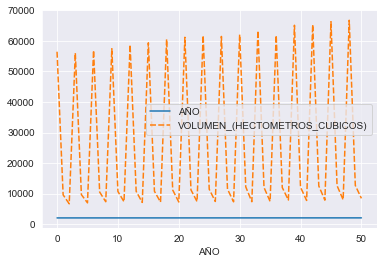